In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("data/consum_total_agregat.csv")

# RENAME COLUMNS
df.columns = [
    "CensusSection", "District", "Municipality", "Date",
    "Use", "NumMeters", "Consumption_L_day"
]

# TRANSFORM DATE COLUMN
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

display(df.head())

/var/folders/75/d19stbkx517flmxxrmxng2lc0000gn/T/ipykernel_4698/1976660571.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/consum_total_agregat.csv")


,CensusSection,District,Municipality,Date,Use,NumMeters,Consumption_L_day
0,801901001,1,BARCELONA,2023-01-01,Comercial/Comercial/Commercial,64,14258
1,801901001,1,BARCELONA,2023-01-01,Domèstic/Doméstico/Domestic,395,11089
2,801901001,1,BARCELONA,2023-01-01,Industrial/Industrial/Industrial,20,490360
3,801901001,1,BARCELONA,2023-01-02,Comercial/Comercial/Commercial,64,6780
4,801901001,1,BARCELONA,2023-01-02,Domèstic/Doméstico/Domestic,395,11571


In [ ]:
df.shape
# There are 963419 rows and 7 columns in the dataset.

(963419, 7)

In [23]:
# CHECKING DATA TYPES AND NON-NULL COUNTS
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963419 entries, 0 to 963418
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CensusSection      962324 non-null  object        
 1   District           962324 non-null  object        
 2   Municipality       963419 non-null  object        
 3   Date               963419 non-null  datetime64[ns]
 4   Use                963419 non-null  object        
 5   NumMeters          963419 non-null  int64         
 6   Consumption_L_day  963419 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 51.5+ MB


None

In [26]:
# SUMMARY STATISTICS
print("\nDescriptive statistics:")
display(df.describe())
print("\nUnique values per column:")
display(df.nunique())


Descriptive statistics:


,Date,NumMeters,Consumption_L_day
count,963419,963419.000000,9.634190e+05
mean,2023-07-02 21:54:25.932268288,252.194256,2.374084e+04
min,2023-01-01 00:00:00,2.000000,-1.642869e+06
25%,2023-04-03 00:00:00,25.000000,3.832000e+03
50%,2023-07-03 00:00:00,70.000000,8.079000e+03
75%,2023-10-02 00:00:00,493.000000,1.503100e+04
max,2023-12-31 00:00:00,2917.000000,1.693004e+07
std,NaN,283.118277,2.261520e+05



Unique values per column:


CensusSection         1076
District                17
Municipality             1
Date                   365
Use                      3
NumMeters             1506
Consumption_L_day    91483
dtype: int64

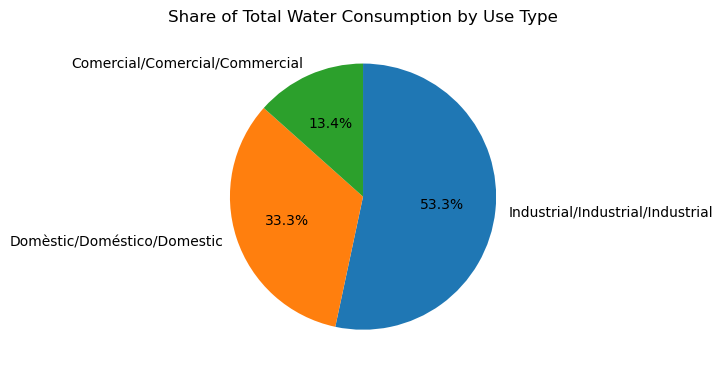

In [30]:
# Use pie chart distribution
use_share = (
    df.groupby("Use")["Consumption_L_day"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(7,7))
plt.pie(
    use_share,
    labels=use_share.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title("Share of Total Water Consumption by Use Type")
plt.tight_layout()
plt.show()

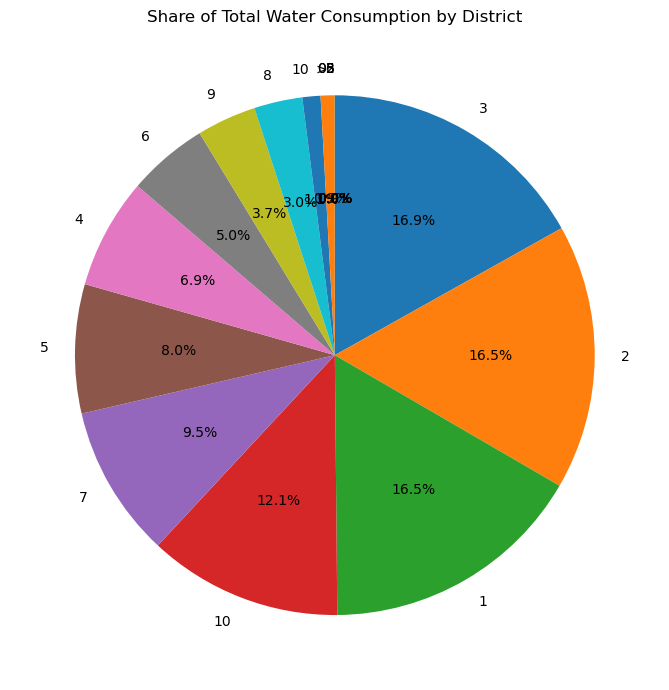

In [32]:
# District pie chart distribution
district_share = (
    df.groupby("District")["Consumption_L_day"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(7,7))
plt.pie(
    district_share,
    labels=district_share.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title("Share of Total Water Consumption by District")
plt.tight_layout()
plt.show()

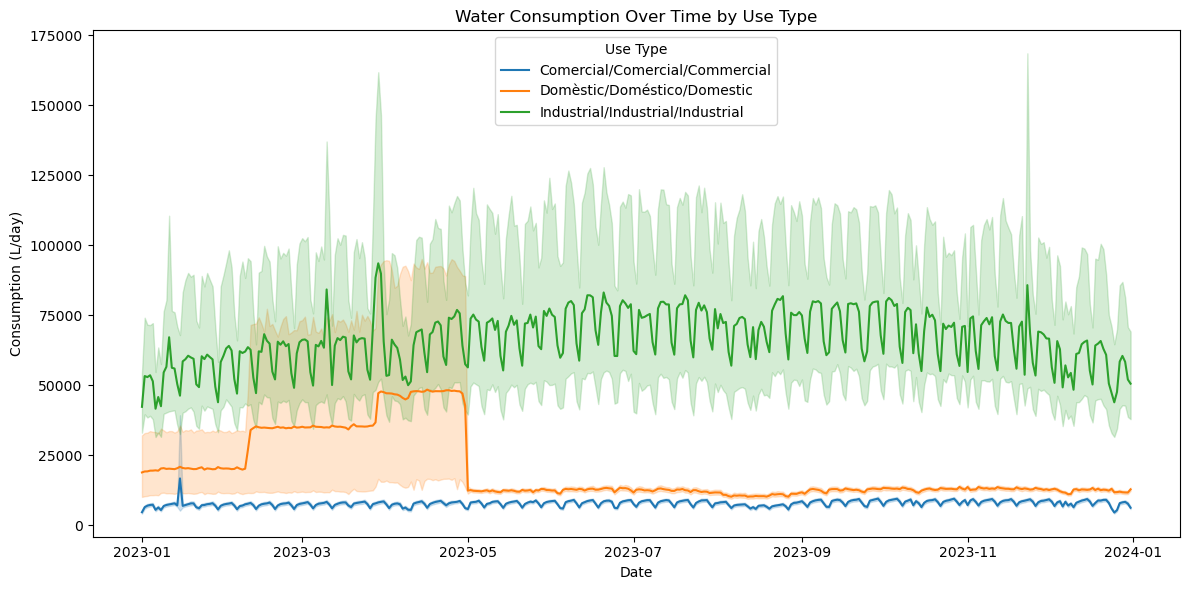

In [29]:
# Consumption over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Consumption_L_day", hue="Use")
plt.title("Water Consumption Over Time by Use Type")
plt.xlabel("Date")
plt.ylabel("Consumption (L/day)")
plt.legend(title="Use Type")
plt.tight_layout()
plt.show()